# 7) Testing - Predicciones

Se justifica la selección del tratamiento de variables que mejores métricas ha obtenido en los distintos modelos.

Comparamos las métricas de los distintos modelos del tratamiento de variables seleccionado y seleccionamos el modelo que mejores resultado ha obtenido.

Entrenamos el referido modelo (dataset training, 150K obs) y efectuamos la predicciones sobre el dataset de test (dataset testing, 101K obs).

Generamos archivos de subida a Kaggle

#### Paquetes

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd


#### Funciones

In [61]:
def plot_classification_report(classificationReport,
                               title='Classification report',
                               cmap='RdBu'):

    classificationReport = classificationReport.replace('\n\n', '\n')
    classificationReport = classificationReport.replace(' / ', '/')
    lines = classificationReport.split('\n')

    classes, plotMat, support, class_names = [], [], [], []
    for line in lines[1:]:  # if you don't want avg/total result, then change [1:] into [1:-1]
        t = line.strip().split()
        if len(t) < 2:
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        plotMat.append(v)

    plotMat = np.array(plotMat)
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup)
                   for idx, sup in enumerate(support)]

    plt.imshow(plotMat, interpolation='nearest', cmap=cmap, aspect='auto')
    plt.title(title)
    plt.colorbar()
    plt.xticks(np.arange(3), xticklabels, rotation=45)
    plt.yticks(np.arange(len(classes)), yticklabels)
    
    upper_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 8
    lower_thresh = plotMat.min() + (plotMat.max() - plotMat.min()) / 10 * 2
    for i, j in itertools.product(range(plotMat.shape[0]), range(plotMat.shape[1])):
        plt.text(j, i, format(plotMat[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if (plotMat[i, j] > upper_thresh or plotMat[i, j] < lower_thresh) else "black")

    plt.ylabel('Metrics')
    plt.xlabel('Classes')
    plt.tight_layout()
    
    

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


## 1) Tratamiento de variables

Para todos y cada uno de los modelos definidos, el tratamiento de datos 1 ha sido el que ha obtenido mejores resultados en términos de accuracy y recall.

In [23]:
# Nos traemos los datos de tratamiento 1 tanto de train como de test.
%store -r newtrain_t1
%store -r newtest_t1

In [38]:
Xd_train = newtrain_t1.iloc[:,1:]
yd_train = newtrain_t1.iloc[:,0]
Xd_test = newtest_t1.iloc[:,1:]
yd_test = newtest_t1.iloc[:,0]

In [39]:
print (Xd_train.shape)
print (yd_train.shape)
print (Xd_test.shape)
print (yd_test.shape)

(150000, 248)
(150000,)
(101503, 248)
(101503,)


## 2) Selección del modelo

#### Comparativa y selección de modelos

Las métricas que hemos considerado para la selección del modelo definitivo precisión, recall y F1-score.

- Logística: Las observaciones positivas correctamente predecidas (recall) son un 68%. Mejor que otros modelos. Sin embargo  no es una métrica tan atractiva si nos fijamos en que la precisión (relación de las observaciones positivas pronosticadas correctamente al total de observaciones positivas pronosticadas) es solo 0.23%. Esto se debe a que el modelo predice muchas observaciones como 1. El valor real de este modelo es muy limitado.


- Random Forest: El resultado de este modelo es muy similar al obtenido con la logística. Predices muchos valores positivos, acercentando gran parte de los verdaderos positivos pero errando mucho (falsos positivos).


- SVM: El modelo ha fallado en captar adecuadamente nuestra muestra. Previsiblemente por el desbalanceo entre positivos y negativos (en mucho mayor número), las predicciones arrojadas mediante este algoritmo, han premiado absolutamente los resultados negativos, con una sensibilidad nula para los casos positivos. Este modelo es el que menor valor real aportaría.


- XGBoost: Es el modelo más equilibrado de todos. El error en falsos positivos es muy bajo (importante en término de negocio). Por el lado contrario, el modelo tiene muy poca sensiblidad a los positivos, aunque es el que los predice con mayor precisión. 


## Datos tratamiento 1

#### Logística

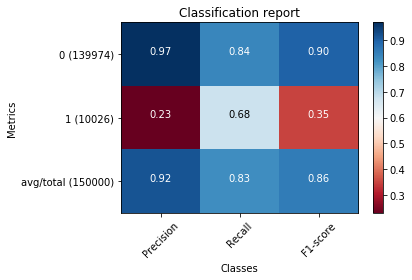

In [6]:
%store -r metricas_LG_t1
plot_classification_report(metricas_LG_t1)

Confusion matrix, without normalization
[[117627  22347]
 [  3253   6773]]


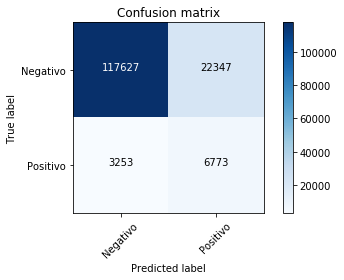

In [12]:
%store -r cnf_matrix_LG
class_names = list(["Negativo","Positivo"])
plot_confusion_matrix(cnf_matrix_LG, classes=class_names,
                      title='Confusion matrix')

#### Random Forest

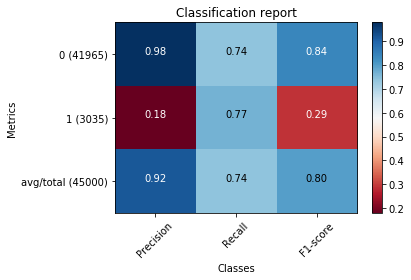

In [8]:
%store -r metricas_RF_t1
plot_classification_report(metricas_RF_t1)

Confusion matrix, without normalization
[[31034 10931]
 [  711  2324]]


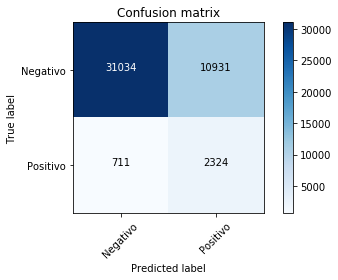

In [10]:
%store -r cnf_matrix_RF
class_names = list(["Negativo","Positivo"])
plot_confusion_matrix(cnf_matrix_RF, classes=class_names,
                      title='Confusion matrix')

#### SVM

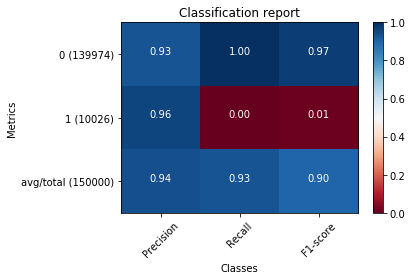

In [17]:
%store -r metricas_SV_t1
plot_classification_report(metricas_SV_t1)

Confusion matrix, without normalization
[[139973      1]
 [ 10000     26]]


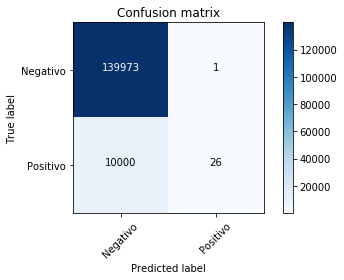

In [19]:
%store -r cnf_matrix_SV
class_names = list(["Negativo","Positivo"])
plot_confusion_matrix(cnf_matrix_SV, classes=class_names,
                      title='Confusion matrix')

#### XGBoost

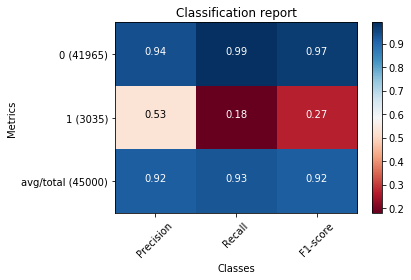

In [13]:
%store -r metricas_GB_t1
plot_classification_report(metricas_GB_t1)

Confusion matrix, without normalization
[[41476   489]
 [ 2474   561]]


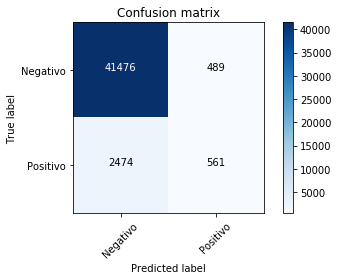

In [20]:
%store -r cnf_matrix_GB
class_names = list(["Negativo","Positivo"])
plot_confusion_matrix(cnf_matrix_GB, classes=class_names,
                      title='Confusion matrix')

## 3) Entrenamiento del modelo y predicciones

In [43]:
# Training
gbc_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, max_depth=8, random_state=42)
gbc_clf.fit(Xd_train,yd_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=300,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

In [44]:
gbc_clf_proba = gbc_clf.predict_proba(Xd_test)
gbc_clf_scores = gbc_clf_proba[:,1]

## 4) Generar archivo para subida

In [52]:
credit_test_df = pd.read_csv("all/cs-test.csv",header=None)
X_test  = credit_test_df
Y_pred = gbc_clf_scores

C:\Users\pc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [56]:
#prediction = pd.DataFrame({
  #      "Id": credit_test_df["Id"],
   #     "Probability": Y_pred
    # })
#prediction.to_csv('submit.csv', index=False)

In [57]:
gbc_clf_scores.shape

(101503,)

In [58]:
ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': gbc_clf_scores})
submission.to_csv('submission_credit.csv', index=False)

![title](imagen/ScoreGiveMeSomeCredit.png)